# Laboratorio 5 - Autocodificadores
## Integrantes
* Maria Isabel Solano 20504
* Gabriel Alejandro Vicente Lorenzzo 20498
## Objetivos
• Comprender la arquitectura y funcionamiento de un autocodificador.<br/>
• Utilizar un autocodificador para la reducción de dimensionalidad en un conjunto de datos
reales.<br/>
• Interpretar las salidas del modelo para descubrir percepciones nuevas ("insights") sobre el
consumo de comida en diferentes países del Reino Unido.<br/>
## Herramientas Requeridas
• Python 3.x<br/>
• Bibliotecas: TensorFlow , Pandas, Matplotlib, scikit-learn
## Datos
Se proporciona el archivo UK_foods.csv, que contiene datos del consumo, en gramos, por persona
por semana de diferentes comidas en cuatro países del Reino Unido.

## Librerias

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Parte 1: Preparación de Datos (15 puntos)
1.1 Cargue los datos en un DataFrame de Pandas.<br/>
1.2 Realice una exploración básica de los datos (estadísticas descriptivas).<br/>
1.3 Normalice los datos, si es necesario.

In [2]:
""" 1.1 """
df = pd.read_csv('UK_foods.csv')


           England        Wales     Scotland    N.Ireland
count    17.000000    17.000000    17.000000    17.000000
mean    469.647059   503.941176   460.235294   429.941176
std     452.701466   463.859282   469.595907   479.896014
min      54.000000    64.000000    53.000000    41.000000
25%     156.000000   175.000000   147.000000   135.000000
50%     253.000000   265.000000   242.000000   209.000000
75%     685.000000   803.000000   566.000000   586.000000
max    1472.000000  1582.000000  1572.000000  1506.000000


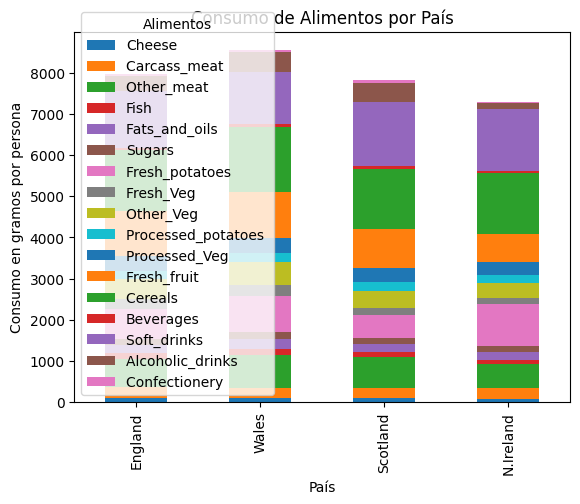

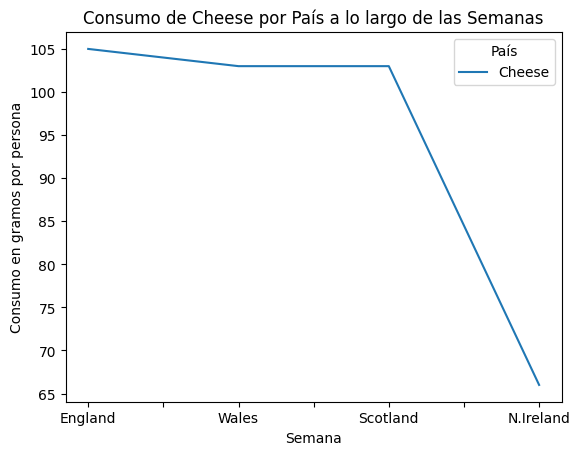

In [3]:
""" 1.2 """

descripcion = df.describe()
print(descripcion)

import matplotlib.pyplot as plt

df.set_index('Food').T.plot(kind='bar', stacked=True)
plt.title('Consumo de Alimentos por País')
plt.xlabel('País')
plt.ylabel('Consumo en gramos por persona')
plt.legend(title='Alimentos')
plt.show()

# Elegir un alimento específico (por ejemplo, "Cheese")
alimento_seleccionado = df[df['Food'] == 'Cheese']

# Crear un gráfico de líneas
alimento_seleccionado.set_index('Food').T.plot(kind='line')
plt.title('Consumo de Cheese por País a lo largo de las Semanas')
plt.xlabel('Semana')
plt.ylabel('Consumo en gramos por persona')
plt.legend(title='País')
plt.show()




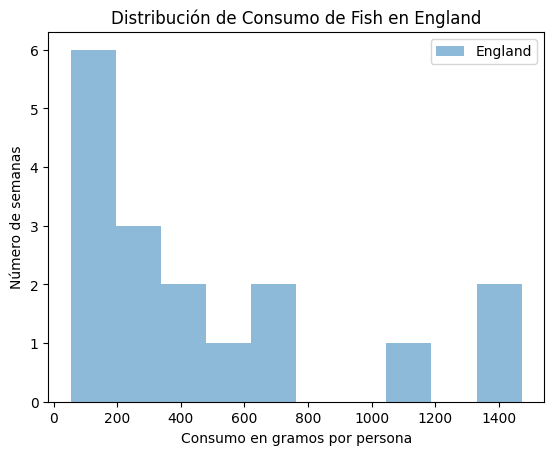

In [4]:
# Elegir un país y un alimento específico (por ejemplo, "England" y "Fish")
pais_seleccionado = 'England'
alimento_seleccionado = 'Fish'

# Crear un histograma
plt.hist(df[pais_seleccionado], bins=10, alpha=0.5, label=pais_seleccionado)
plt.title(f'Distribución de Consumo de {alimento_seleccionado} en {pais_seleccionado}')
plt.xlabel('Consumo en gramos por persona')
plt.ylabel('Número de semanas')
plt.legend()
plt.show()


In [5]:
from sklearn.preprocessing import MinMaxScaler
df = df.iloc[:, 1:]
display(df)
normalizador = MinMaxScaler()
datos_normalizados = normalizador.fit_transform(df)
display(datos_normalizados)

,England,Wales,Scotland,N.Ireland
0,105,103,103,66
1,245,227,242,267
2,685,803,750,586
3,147,160,122,93
4,193,235,184,209
5,156,175,147,139
6,720,874,566,1033
7,253,265,171,143
8,488,570,418,355
9,198,203,220,187


array([[0.03596615, 0.0256917 , 0.03291639, 0.01706485],
       [0.13469676, 0.10737813, 0.12442396, 0.15426621],
       [0.44499295, 0.48682477, 0.45885451, 0.37201365],
       [0.06558533, 0.06324111, 0.04542462, 0.03549488],
       [0.09802539, 0.11264822, 0.08624095, 0.11467577],
       [0.0719323 , 0.07312253, 0.06188282, 0.0668942 ],
       [0.4696756 , 0.53359684, 0.33772219, 0.67713311],
       [0.1403385 , 0.13241107, 0.07768269, 0.06962457],
       [0.30606488, 0.33333333, 0.24028966, 0.21433447],
       [0.10155148, 0.09156785, 0.10994075, 0.0996587 ],
       [0.2157969 , 0.19828722, 0.18696511, 0.2       ],
       [0.73906911, 0.70685112, 0.59512837, 0.43208191],
       [1.        , 1.        , 0.92758394, 0.99180887],
       [0.00211566, 0.00592885, 0.        , 0.00409556],
       [0.93088858, 0.78524374, 1.        , 1.        ],
       [0.22637518, 0.27075099, 0.26662278, 0.06416382],
       [0.        , 0.        , 0.00592495, 0.        ]])

## Parte 2: Construcción del Autocodificador (40 puntos)
2.1 Dada la pequeña cantidad de datos, utilice todas las observaciones para entrenar el modelo.<br/>
2.2 Defina la arquitectura del autocodificador. Asegúrese de reducir las dimensiones a 2 en la capa
de “cuello de botella". (Podría ser interesante probar modelos secuenciales y funcionales)<br/>
2.3 Compile y entrene el modelo.<br/>
2.4 Evalúe el rendimiento del autocodificador utilizando medidas como la pérdida de
reconstrucción.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

codificador = Sequential()
codificador.add(Dense(units = 2, activation = 'relu', input_shape = [4]))

In [7]:

decodificador = Sequential()
decodificador.add(Dense(units = 4, activation = 'relu', input_shape = [2]))

In [8]:
from tensorflow.keras.optimizers import SGD

autocodificador = Sequential([codificador, decodificador])
autocodificador.compile(loss = "mse", optimizer = SGD(lr = 1.5))

In [10]:
autocodificador.fit(datos_normalizados,datos_normalizados, epochs = 100)

Epoch 1/100


1/1 [==============================] - 0s 319ms/step - loss: 0.3413
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3270
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.3136
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3011
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2892
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2781
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2677
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2578
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2485
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2397
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2314
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2235
Epoch 13/100
1/1 [==============================] - 0s 8ms/step - loss:

In [11]:
puntuacion_perdida = autocodificador.evaluate(datos_normalizados, datos_normalizados)

print("Pérdida de Reconstrucción en Datos de Prueba:", puntuacion_perdida)


1/1 [==============================] - 0s 164ms/step - loss: 0.0481
Pérdida de Reconstrucción en Datos de Prueba: 0.048103202134370804
